<a href="https://colab.research.google.com/github/gorkemguveenn/sigarai-meanalizi/blob/main/smokinganalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import plotly.express as px
from plotly.offline import iplot, plot
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
df=pd.read_csv('smoking.csv')

In [ ]:
df2=pd.read_csv('smokinghealth.csv')

In [ ]:
df.shape


(1691, 12)

In [ ]:
df.describe()

,age,amt_weekends,amt_weekdays
count,1691.000000,421.000000,421.000000
mean,49.836192,16.410926,13.750594
std,18.736851,9.892988,9.388292
min,16.000000,0.000000,0.000000
25%,34.000000,10.000000,7.000000
50%,48.000000,15.000000,12.000000
75%,65.500000,20.000000,20.000000
max,97.000000,60.000000,55.000000


In [ ]:
df2.shape

(3186, 7)

In [ ]:
df.columns

Index(['gender', 'age', 'marital_status', 'highest_qualification',
       'nationality', 'ethnicity', 'gross_income', 'region', 'smoke',
       'amt_weekends', 'amt_weekdays', 'type'],
      dtype='object')

In [ ]:
df2.columns

Index(['age', 'sex', 'current_smoker', 'heart_rate', 'blood_pressure',
       'cigs_per_day', 'chol'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 1691 non-null   object 
 1   age                    1691 non-null   int64  
 2   marital_status         1691 non-null   object 
 3   highest_qualification  1691 non-null   object 
 4   nationality            1691 non-null   object 
 5   ethnicity              1691 non-null   object 
 6   gross_income           1691 non-null   object 
 7   region                 1691 non-null   object 
 8   smoke                  1691 non-null   object 
 9   amt_weekends           421 non-null    float64
 10  amt_weekdays           421 non-null    float64
 11  type                   421 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 158.7+ KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3186 entries, 0 to 3185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3186 non-null   int64  
 1   sex             3186 non-null   object 
 2   current_smoker  3186 non-null   object 
 3   heart_rate      3186 non-null   int64  
 4   blood_pressure  3186 non-null   object 
 5   cigs_per_day    3172 non-null   float64
 6   chol            3180 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 174.4+ KB


In [ ]:
df.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


In [ ]:
df2.tail()

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
3181,37,male,yes,88,122.5/82.5,60.0,254.0
3182,49,male,yes,70,123/75,60.0,213.0
3183,56,male,yes,70,125/79,60.0,246.0
3184,50,male,yes,85,134/95,60.0,340.0
3185,40,male,yes,98,132/86,70.0,210.0


In [ ]:
#UYUŞMAZLIKLARI DÜZELTME

In [ ]:
#İlk harfi büyük geri kalanı küçük hale getiren str.capitalize
df2['sex'] = df2['sex'].str.capitalize()
df2['current_smoker'] = df2['current_smoker'].str.capitalize()

In [ ]:
df2.rename(columns={'current_smoker': 'smoke','sex':'gender'}, inplace=True)

In [ ]:
df2.sample(5)

,age,gender,smoke,heart_rate,blood_pressure,cigs_per_day,chol
2174,58,Male,Yes,75,136/88,20.0,200.0
1978,58,Male,Yes,92,156/86,15.0,264.0
109,53,Female,No,85,137/76,0.0,265.0
1211,40,Female,No,85,125/90,0.0,290.0
964,48,Female,No,67,117/81.5,0.0,244.0


In [ ]:
#Eşleşen sütunları filtreleme
df2 = df2[['gender', 'age', 'smoke']]

In [ ]:
columns_to_preserve = df.columns# df'nin Tüm sütun adlarını korumak ve df2 ile uyumluluk sağlamak için

for col in columns_to_preserve:#df deki sütunlar sırayla kontrol edilir
    if col not in df2.columns:#eğer df2 de  df döngüsündeki sütun yoksa ifin içine girer
        df2[col] = pd.NA#yeni sütun oluştur ve NaN ata

# Sütunları smoking_df ile aynı sıraya getirmek için
df2 = df2[columns_to_preserve]
merged_df = pd.concat([df, df2[columns_to_preserve]], ignore_index=True)[columns_to_preserve]
output_path = '/content/mergesmoking.csv'

merged_df.to_csv(output_path, index=False)

<ipython-input-496-d401e3473915>:9: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [ ]:
df3=pd.read_csv('mergesmoking.csv')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4877 entries, 0 to 4876
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 4877 non-null   object 
 1   age                    4877 non-null   int64  
 2   marital_status         1691 non-null   object 
 3   highest_qualification  1691 non-null   object 
 4   nationality            1691 non-null   object 
 5   ethnicity              1691 non-null   object 
 6   gross_income           1691 non-null   object 
 7   region                 1691 non-null   object 
 8   smoke                  4877 non-null   object 
 9   amt_weekends           421 non-null    float64
 10  amt_weekdays           421 non-null    float64
 11  type                   421 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 457.3+ KB


In [ ]:
def getRate(a):
    d=dict(a)
    total=sum(d.values())
    yes=d.get('Yes')
    no=d.get('No')
    d2={}
    d2['Yes']=yes/total*100
    d2['No']=no/total*100
    return d2
a=df3['smoke'].value_counts()
getRate(a)

{'Yes': 48.24687307771171, 'No': 51.753126922288295}

In [ ]:
gender = df3['gender'].value_counts().reset_index()
gender

,gender,count
0,Female,2600
1,Male,2277


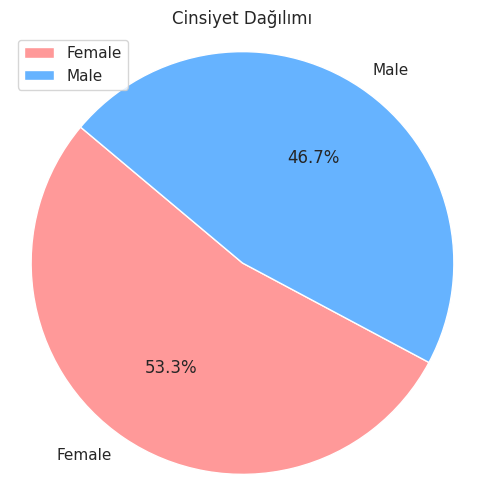

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(gender['count'], labels=gender['gender'], autopct='%1.1f%%', startangle=140,colors=['#ff9999', '#66b3ff'])
plt.axis('equal')
plt.legend(loc = 'upper left')
plt.title('Cinsiyet Dağılımı')
plt.show()

In [ ]:
#Sigara içenleri cinsiyete göre gruplama
male_female_smoke = df3[df3['smoke'] == 'Yes'].groupby('gender').size().reset_index(name='count')
print(male_female_smoke)

   gender  count
0  Female   1061
1    Male   1292


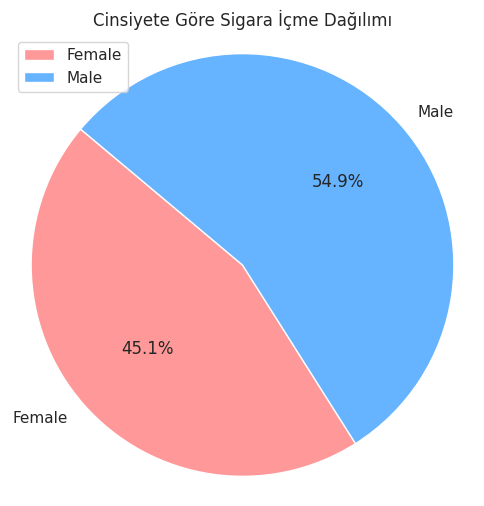

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(male_female_smoke['count'], labels=male_female_smoke['gender'], autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff'])
plt.axis('equal')
plt.legend(loc='upper left')
plt.title('Cinsiyete Göre Sigara İçme Dağılımı')
plt.show()



In [ ]:
avg_age = df3.groupby('gender')['age'].mean().reset_index()
avg_age

,gender,age
0,Female,49.593846
1,Male,49.035134


<ipython-input-505-0cd617e53ede>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




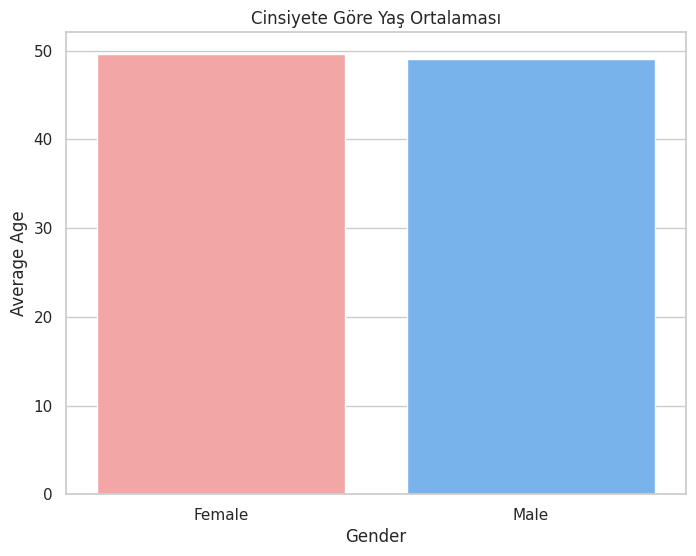

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='age', data=avg_age, palette=['#ff9999', '#66b3ff'])
plt.title('Cinsiyete Göre Yaş Ortalaması')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.show()

In [ ]:
#VERİ ÖNİŞLEME

In [ ]:
null_values = df3.isnull().sum()
print(null_values)

gender                      0
age                         0
marital_status           3186
highest_qualification    3186
nationality              3186
ethnicity                3186
gross_income             3186
region                   3186
smoke                       0
amt_weekends             4456
amt_weekdays             4456
type                     4456
dtype: int64


In [ ]:
numeric_columns = df3.select_dtypes(include=['int64', 'float64']).columns
negative_values = {col: (df3[col] < 0).sum() for col in numeric_columns}
print(negative_values)

{'age': 0, 'amt_weekends': 0, 'amt_weekdays': 0}


In [ ]:
invalid_values = {}
for col in df3.columns:
    dtype = df3[col].dtype
    if dtype == 'int64' or dtype == 'float64':
        invalid_values[col] = df3[col].apply(lambda x: isinstance(x, (int, float))).sum() != len(df3[col])
    elif dtype == 'object':
        invalid_values[col] = df3[col].apply(lambda x: isinstance(x, str)).sum() != len(df3[col])
print(invalid_values)

{'gender': False, 'age': False, 'marital_status': True, 'highest_qualification': True, 'nationality': True, 'ethnicity': True, 'gross_income': True, 'region': True, 'smoke': False, 'amt_weekends': False, 'amt_weekdays': False, 'type': True}


In [ ]:
df3.describe()

,age,amt_weekends,amt_weekdays
count,4877.000000,421.000000,421.000000
mean,49.332992,16.410926,13.750594
std,12.993398,9.892988,9.388292
min,16.000000,0.000000,0.000000
25%,40.000000,10.000000,7.000000
50%,48.000000,15.000000,12.000000
75%,58.000000,20.000000,20.000000
max,97.000000,60.000000,55.000000


In [ ]:
av_age = df3.groupby('gender')['amt_weekends'].mean().reset_index()
av_age

,gender,amt_weekends
0,Female,15.004274
1,Male,18.171123


In [ ]:
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ["18-25", "26-35", "36-45", "46-55", "56-65", "65+"]
df3["age_group"] = pd.cut(df3["age"], bins=bins, labels=labels, right=False)

In [ ]:
group_medians = (
    df3.groupby(["age_group", "smoke"])[["amt_weekends", "amt_weekdays"]]
    .median()
    .reset_index()
)

<ipython-input-513-938de02937b3>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
def fill_missing_values(row, col):

    if pd.isnull(row[col]):
        median_value = group_medians.loc[
            (group_medians["age_group"] == row["age_group"]) & (group_medians["smoke"] == row["smoke"]), col
        ]
        return median_value.values[0] if not median_value.empty else row[col]
    return row[col]

In [ ]:
no_smoke_rows = df3.loc[df3['smoke'] == 'No']
df3.loc[no_smoke_rows.index, ['amt_weekends', 'amt_weekdays']] = 0
df3["amt_weekends"] = df3.apply(fill_missing_values, axis=1, col="amt_weekends")
df3["amt_weekdays"] = df3.apply(fill_missing_values, axis=1, col="amt_weekdays")

In [ ]:
df3.sample(5)

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type,age_group
1536,Male,41,Single,Higher/Sub Degree,British,White,"20,800 to 28,600",Wales,Yes,20.0,12.0,Packets,36-45
4010,Male,43,NaN,NaN,NaN,NaN,NaN,NaN,Yes,15.0,12.0,NaN,36-45
3553,Female,38,NaN,NaN,NaN,NaN,NaN,NaN,Yes,15.0,12.0,NaN,36-45
3382,Female,42,NaN,NaN,NaN,NaN,NaN,NaN,Yes,15.0,12.0,NaN,36-45
4673,Male,47,NaN,NaN,NaN,NaN,NaN,NaN,Yes,20.0,20.0,NaN,46-55


In [ ]:
# Sigara içenlerin verileri
smoke_yes_data = df3[df3['smoke'] == 'Yes']

# amt_weekends ve amt_weekdays sütunları 0 olan smoke=yes verilerini kontrol ve silme
smoke_yes_zero_data = smoke_yes_data[(smoke_yes_data['amt_weekends'] == 0) & (smoke_yes_data['amt_weekdays'] == 0)]
print(f"amt_weekends ve amt_weekdays değerleri 0 olan smoke=yes veri sayısı: {len(smoke_yes_zero_data)}")

amt_weekends ve amt_weekdays değerleri 0 olan smoke=yes veri sayısı: 1


In [ ]:
df3 = df3.drop(df3[(df3['smoke'] == 'Yes') & (df3['amt_weekends'] == 0) & (df3['amt_weekdays'] == 0)].index)


In [ ]:
smoke_yes_data = df3[df3['smoke'] == 'Yes']
smoke_yes_zero_data = smoke_yes_data[(smoke_yes_data['amt_weekends'] == 0) & (smoke_yes_data['amt_weekdays'] == 0)]
print(f"amt_weekends ve amt_weekdays değerleri  0 olan smoke=yes veri sayısı: {len(smoke_yes_zero_data)}")

amt_weekends ve amt_weekdays değerleri  0 olan smoke=yes veri sayısı: 0


In [ ]:
categorical_columns = [
    'marital_status', 'highest_qualification', 'nationality',
    'ethnicity', 'gross_income', 'region', 'type'
]
for col in categorical_columns:
    if col in df3.columns:
        df3[col] = df3[col].fillna(df3[col].mode()[0])


In [ ]:
no_smoke_rows = df3.loc[df3['smoke'] == 'No']
df3.loc[no_smoke_rows.index, 'type'] = 'Non-Smoker'
print(df3['type'].value_counts())

type
Non-Smoker                 2524
Packets                    2228
Hand-Rolled                  72
Both/Mainly Packets          42
Both/Mainly Hand-Rolled      10
Name: count, dtype: int64


In [ ]:
df3.sample(5)

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type,age_group
385,Male,67,Married,No Qualification,British,White,"5,200 to 10,400",The North,No,0.0,0.0,Non-Smoker,65+
1426,Male,35,Single,Other/Sub Degree,British,White,"Under 2,600",South West,Yes,10.0,10.0,Packets,36-45
2130,Female,60,Married,No Qualification,English,White,"5,200 to 10,400",Midlands & East Anglia,No,0.0,0.0,Non-Smoker,56-65
1578,Female,79,Widowed,GCSE/CSE,Scottish,White,Refused,Scotland,No,0.0,0.0,Non-Smoker,65+
2454,Female,64,Married,No Qualification,English,White,"5,200 to 10,400",Midlands & East Anglia,No,0.0,0.0,Non-Smoker,56-65


In [ ]:
df3 = df3.drop(columns=['age_group'])

print(df3.columns)

Index(['gender', 'age', 'marital_status', 'highest_qualification',
       'nationality', 'ethnicity', 'gross_income', 'region', 'smoke',
       'amt_weekends', 'amt_weekdays', 'type'],
      dtype='object')


In [ ]:
null_values = df3.isnull().sum()
print(null_values)

gender                   0
age                      0
marital_status           0
highest_qualification    0
nationality              0
ethnicity                0
gross_income             0
region                   0
smoke                    0
amt_weekends             0
amt_weekdays             0
type                     0
dtype: int64


In [ ]:
histogram_labels = ['age',
                    'gross_income',
                    'amt_weekends',
                    'amt_weekdays'
                   ]

colors = px.colors.qualitative.Vivid
for i in range(len(histogram_labels)):
    fig = px.histogram(df3,
                       histogram_labels[i],
                       title=f'{histogram_labels[i]} sütunun dağılım histogramı',
                       color_discrete_sequence=[colors[i]]
                      )
    iplot(fig)

In [ ]:
#smoke_yes_data = df3[df3['smoke'] == 'Yes']
#Q1_weekends = smoke_yes_data['amt_weekends'].quantile(0.25)
#Q3_weekends = smoke_yes_data['amt_weekends'].quantile(0.75)
#IQR_weekends = Q3_weekends - Q1_weekends
#lower_bound_weekends = max(0, Q1_weekends - 1.5 * IQR_weekends)
#upper_bound_weekends = Q3_weekends + 1.5 * IQR_weekends

#Q1_weekdays = smoke_yes_data['amt_weekdays'].quantile(0.25)
#Q3_weekdays = smoke_yes_data['amt_weekdays'].quantile(0.75)
#IQR_weekdays = Q3_weekdays - Q1_weekdays
#lower_bound_weekdays = max(0, Q1_weekdays - 2.5 * IQR_weekdays)
#upper_bound_weekdays = Q3_weekdays + 1.5 * IQR_weekdays




In [ ]:
#filtered_weekends = smoke_yes_data[
#    (smoke_yes_data['amt_weekends'] >= lower_bound_weekends) &
 #   (smoke_yes_data['amt_weekends'] <= upper_bound_weekends)
#]
#filtered_weekdays = smoke_yes_data[
 #   (smoke_yes_data['amt_weekdays'] >= lower_bound_weekdays) &

 #   (smoke_yes_data['amt_weekdays'] <= upper_bound_weekdays)
#]

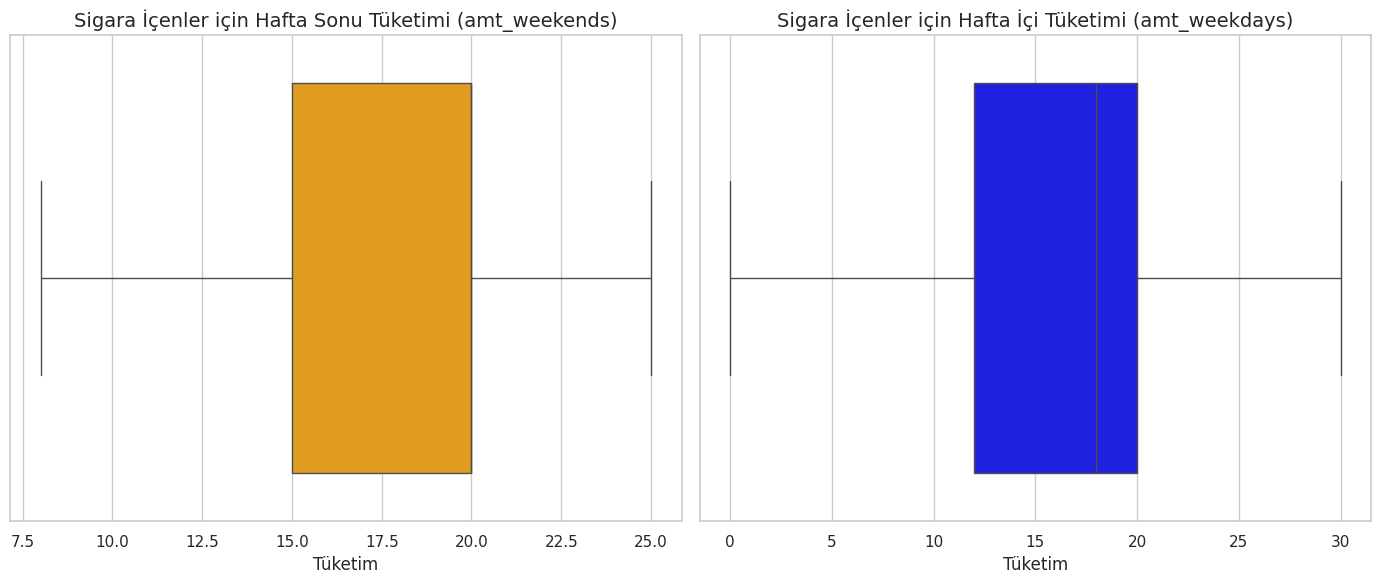

In [ ]:
#plt.figure(figsize=(14, 6))

# Hafta sonu tüketimi için boxplot (sadece smoke=yes)
#plt.subplot(1, 2, 1)
#sns.boxplot(x=filtered_weekends['amt_weekends'], color="orange")
#plt.title('Sigara İçenler için Hafta Sonu Tüketimi (amt_weekends)', fontsize=14)
#plt.xlabel('Tüketim', fontsize=12)

# Hafta içi tüketimi için boxplot (sadece smoke=yes)
#plt.subplot(1, 2, 2)
#sns.boxplot(x=filtered_weekdays['amt_weekdays'], color="blue")
#plt.title('Sigara İçenler için Hafta İçi Tüketimi (amt_weekdays)', fontsize=14)
#plt.xlabel('Tüketim', fontsize=12)

#plt.tight_layout()
#plt.show()

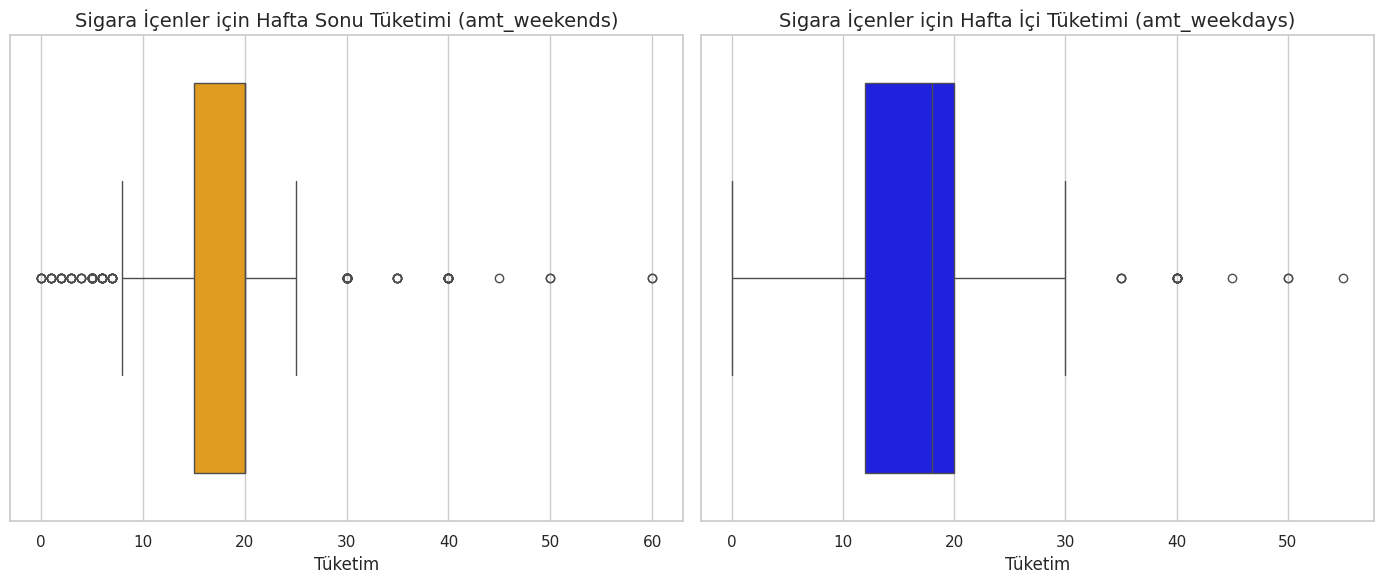

In [ ]:
smoke_yes_data = df3[df3['smoke'] == 'Yes']
smoke_no_data = df3[df3['smoke'] == 'No']



# Boxplot çizimi
plt.figure(figsize=(14, 6))

# Hafta sonu tüketimi için boxplot (sadece smoke=yes)
plt.subplot(1, 2, 1)
sns.boxplot(x=smoke_yes_data['amt_weekends'], color="orange")
plt.title('Sigara İçenler için Hafta Sonu Tüketimi (amt_weekends)', fontsize=14)
plt.xlabel('Tüketim', fontsize=12)



# Hafta içi tüketimi için boxplot (sadece smoke=yes)
plt.subplot(1, 2, 2)
sns.boxplot(x=smoke_yes_data['amt_weekdays'], color="blue")
plt.title('Sigara İçenler için Hafta İçi Tüketimi (amt_weekdays)', fontsize=14)
plt.xlabel('Tüketim', fontsize=12)



plt.tight_layout()
plt.show()



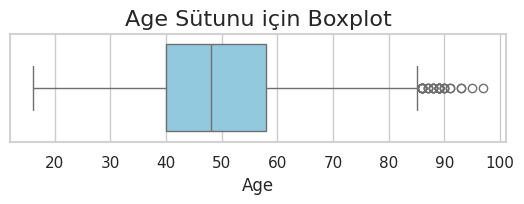

In [ ]:
plt.subplot(3,1,3)
sns.boxplot(x=df3['age'], color='skyblue')
plt.title('Age Sütunu için Boxplot', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.show()

In [ ]:
def remove_outliers(df3, columns):
    for column in columns:
        Q1 = df3[column].quantile(0.25)  # İlk çeyrek (Q1)
        Q3 = df3[column].quantile(0.75)  # Üçüncü çeyrek (Q3)
        IQR = Q3 - Q1  # Çeyrekler arası aralık

        # Alt ve üst sınırları hesaplama
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Aykırı değer olmayanları filtreleme
        df3 = df3[(df3[column] >= lower_bound) & (df3[column] <= upper_bound)]
    return df3

# İşlem yapmak istediğiniz sütunlar
columns_to_check = ['amt_weekends', 'amt_weekdays', 'age']

# Aykırı değerleri temizle
df3 = remove_outliers(df3, columns_to_check)
print("Temizlenmiş veri minimum ve maksimum değerleri:")
print("Hafta sonu tüketimi (amt_weekends):", df3['amt_weekends'].min(), df3['amt_weekends'].max())
print("Hafta içi tüketimi (amt_weekdays):", df3['amt_weekdays'].min(), df3['amt_weekdays'].max())

print("Aykırı Değerlerden Arındırılmış Veri:")
print(df3)


Temizlenmiş veri minimum ve maksimum değerleri:
Hafta sonu tüketimi (amt_weekends): 0.0 45.0
Hafta içi tüketimi (amt_weekdays): 0.0 45.0
Aykırı Değerlerden Arındırılmış Veri:
      gender  age marital_status highest_qualification nationality ethnicity  \
0       Male   38       Divorced      No Qualification     British     White   
1     Female   42         Single      No Qualification     British     White   
2       Male   40        Married                Degree     English     White   
3     Female   40        Married                Degree     English     White   
4     Female   39        Married          GCSE/O Level     British     White   
...      ...  ...            ...                   ...         ...       ...   
4872    Male   37        Married      No Qualification     English     White   
4873    Male   49        Married      No Qualification     English     White   
4874    Male   56        Married      No Qualification     English     White   
4875    Male   50        

In [ ]:
df3.shape

(4826, 12)

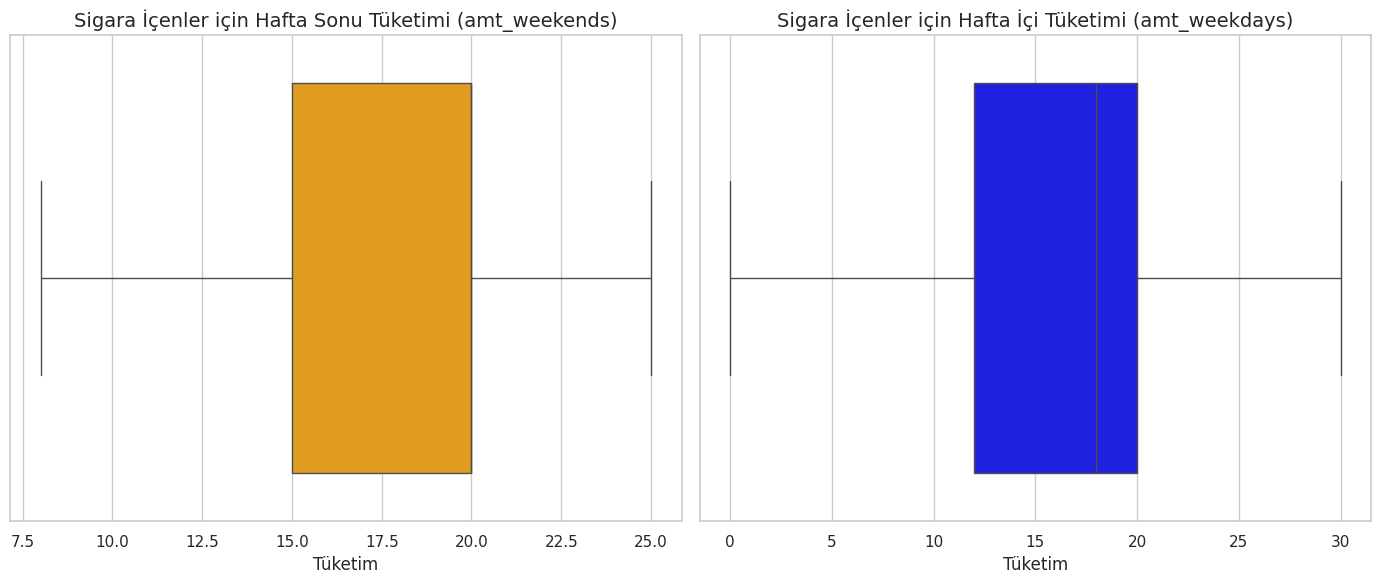

In [ ]:
smoke_yes_data = df3[df3['smoke'] == 'Yes']
smoke_no_data = df3[df3['smoke'] == 'No']



# Boxplot çizimi
plt.figure(figsize=(14, 6))

# Hafta sonu tüketimi için boxplot (sadece smoke=yes)
plt.subplot(1, 2, 1)
sns.boxplot(x=smoke_yes_data['amt_weekends'], color="orange", showfliers=False)
plt.title('Sigara İçenler için Hafta Sonu Tüketimi (amt_weekends)', fontsize=14)
plt.xlabel('Tüketim', fontsize=12)



# Hafta içi tüketimi için boxplot (sadece smoke=yes)
plt.subplot(1, 2, 2)
sns.boxplot(x=smoke_yes_data['amt_weekdays'], color="blue", showfliers=False)
plt.title('Sigara İçenler için Hafta İçi Tüketimi (amt_weekdays)', fontsize=14)
plt.xlabel('Tüketim', fontsize=12)



plt.tight_layout()
plt.show()


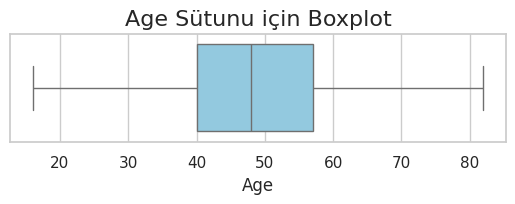

In [ ]:
plt.subplot(3,1,3)
sns.boxplot(x=df3['age'], color='skyblue',showfliers=False)
plt.title('Age Sütunu için Boxplot', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.show()

In [ ]:
categorical_columns = df3.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col])
    label_encoders[col] = le
    print(f"Sütun: {col}")
    print("Kategori Kodlama:")
    for category, code in zip(le.classes_, le.transform(le.classes_)):
        print(f"  {category} -> {code}")
print("Kategorik sütunlar başarıyla kodlandı.")

Sütun: gender
Kategori Kodlama:
  Female -> 0
  Male -> 1
Sütun: marital_status
Kategori Kodlama:
  Divorced -> 0
  Married -> 1
  Separated -> 2
  Single -> 3
  Widowed -> 4
Sütun: highest_qualification
Kategori Kodlama:
  A Levels -> 0
  Degree -> 1
  GCSE/CSE -> 2
  GCSE/O Level -> 3
  Higher/Sub Degree -> 4
  No Qualification -> 5
  ONC/BTEC -> 6
  Other/Sub Degree -> 7
Sütun: nationality
Kategori Kodlama:
  British -> 0
  English -> 1
  Irish -> 2
  Other -> 3
  Refused -> 4
  Scottish -> 5
  Unknown -> 6
  Welsh -> 7
Sütun: ethnicity
Kategori Kodlama:
  Asian -> 0
  Black -> 1
  Chinese -> 2
  Mixed -> 3
  Refused -> 4
  Unknown -> 5
  White -> 6
Sütun: gross_income
Kategori Kodlama:
  10,400 to 15,600 -> 0
  15,600 to 20,800 -> 1
  2,600 to 5,200 -> 2
  20,800 to 28,600 -> 3
  28,600 to 36,400 -> 4
  5,200 to 10,400 -> 5
  Above 36,400 -> 6
  Refused -> 7
  Under 2,600 -> 8
  Unknown -> 9
Sütun: region
Kategori Kodlama:
  London -> 0
  Midlands & East Anglia -> 1
  Scotland -> 2

In [ ]:
print(df3['smoke'].unique())  # smoke değişkenindeki eşsiz değerleri göster
print(df3['smoke'].dtypes)

[0 1]
int64


In [ ]:
print(df3['smoke'].head(10))  # İlk 10 değeri kontrol edin


0    0
1    1
2    0
3    0
4    0
5    0
6    1
7    0
8    1
9    1
Name: smoke, dtype: int64


In [ ]:
numerical_columns = df3.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop('smoke')
scaler = StandardScaler()
df3[numerical_columns] = scaler.fit_transform(df3[numerical_columns])
print("\nStandartlaştırılmış Sayısal Sütunlar:")
print(df3[numerical_columns])

print("Sayısal sütunlar standartlaştırıldı.(Smoke Hariç)")
#Model eğitimi için farklı ölçeklerde(arada çok fark bulunması) çalışması öğrenimi zorlaştırabiliyor bu yüzden
#ortalamasını 0'a ,standart sapmasını 1'e çekiyor özetle farklı ölçekler arasında denge sağlıyor


Standartlaştırılmış Sayısal Sütunlar:
        gender       age  marital_status  highest_qualification  nationality  \
0     1.065551 -0.877306       -1.552553               0.354806    -1.067778   
1    -0.938482 -0.557539        2.108934               0.354806    -1.067778   
2     1.065551 -0.717422       -0.332058              -2.663784    -0.120169   
3    -0.938482 -0.717422       -0.332058              -2.663784    -0.120169   
4    -0.938482 -0.797364       -0.332058              -1.154489    -1.067778   
...        ...       ...             ...                    ...          ...   
4872  1.065551 -0.957248       -0.332058               0.354806    -0.120169   
4873  1.065551  0.002054       -0.332058               0.354806    -0.120169   
4874  1.065551  0.561647       -0.332058               0.354806    -0.120169   
4875  1.065551  0.081996       -0.332058               0.354806    -0.120169   
4876  1.065551 -0.717422       -0.332058               0.354806    -0.120169   



In [ ]:
df3.columns

Index(['gender', 'age', 'marital_status', 'highest_qualification',
       'nationality', 'ethnicity', 'gross_income', 'region', 'smoke',
       'amt_weekends', 'amt_weekdays', 'type'],
      dtype='object')

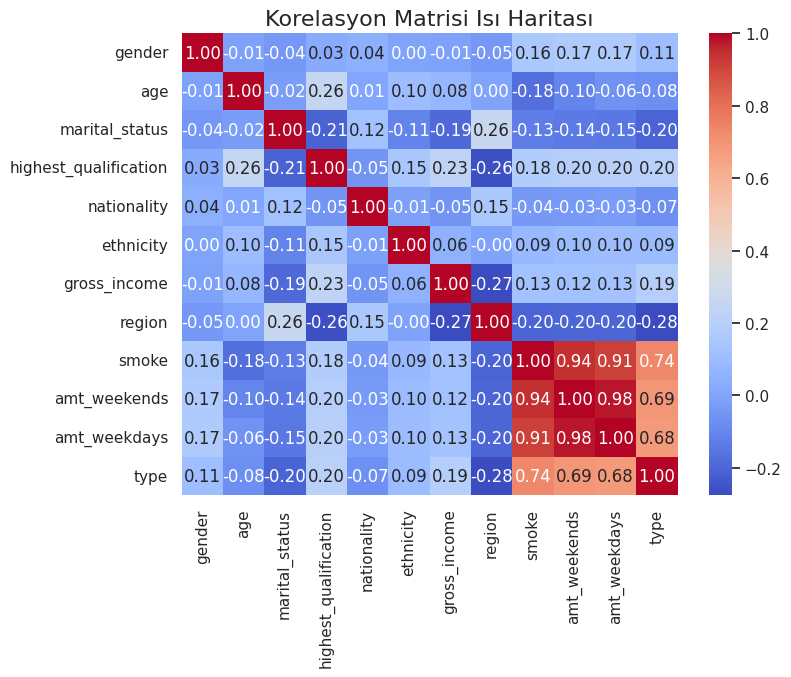

In [ ]:
correlation_matrix = df3.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi Isı Haritası', fontsize=16)
plt.show()

In [ ]:
#Etnik,gender ve national çok düşük korelasyon içinde smoke ile bu iki sütunu silebiliriz
df3 = df3.drop(columns=['nationality', 'ethnicity','marital_status','gross_income'])

print(df3.columns)

Index(['gender', 'age', 'highest_qualification', 'region', 'smoke',
       'amt_weekends', 'amt_weekdays', 'type'],
      dtype='object')


In [ ]:
df3 = df3.drop(columns=['amt_weekends'])
print(df3.columns)

Index(['gender', 'age', 'highest_qualification', 'region', 'smoke',
       'amt_weekdays', 'type'],
      dtype='object')


In [ ]:
#Madencilik Teknikleri

In [ ]:
# Hedef değişken (smoke)
y = df3['smoke']
# Girdi değişkenleri (smoke dışındaki diğer sütunlar)
X = df3.drop(columns=['smoke'])
# Veriyi eğitim ve test seti olarak ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Hedef değişkenin ve diğer değişkenlerin kontrol edilmesi
print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)

X Train shape: (2895, 6)
Y Train shape: (2895,)


In [ ]:
print(set(X_train.index).intersection(set(X_test.index)))  # Çıkış boş olmalı
#Ayrışma kontrol

set()


In [ ]:
#YAPAY SİNİR AĞLARI

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5748 - loss: 0.7068 - val_accuracy: 0.7271 - val_loss: 0.6182
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7569 - loss: 0.5807 - val_accuracy: 0.9309 - val_loss: 0.4639
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8789 - loss: 0.4349 - val_accuracy: 0.9430 - val_loss: 0.3047
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9066 - loss: 0.3093 - val_accuracy: 0.9655 - val_loss: 0.2049
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9521 - loss: 0.2166 - val_accuracy: 0.9741 - val_loss: 0.1452
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9630 - loss: 0.1599 - val_accuracy: 0.9758 - val_loss: 0.1098
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9679 - loss: 0.1315 - val_accuracy: 0.9758 - val_loss: 0.0886
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9772 - loss: 0.1081 - val_accuracy: 0.9758 - val_loss: 0.0739
Epo

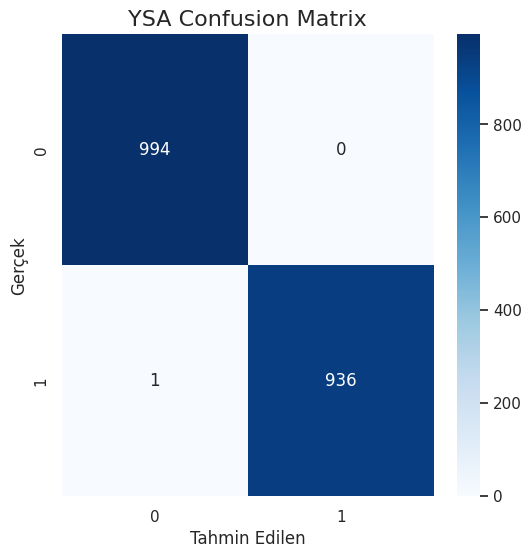

In [ ]:
# Gerekli kütüphaneler
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# YSA modelini oluştur
ysa_model = Sequential()

# Girdi katmanı ve birinci gizli katman
ysa_model.add(Dense(6, input_dim=X_train.shape[1], activation='relu'))  # 16 nöron, girdi boyutu otomatik algılanır
# İkinci gizli katman
ysa_model.add(Dense(8, activation='relu'))  # 8 nöron
ysa_model.add(Dropout(0.2)) # %20 dropout, yani her eğitim adımında %20 nöron devre dışı bırakılacak
# Çıkış katmanı
ysa_model.add(Dense(1, activation='sigmoid'))  # Binary sınıflama için 'sigmoid' aktivasyon
optimizer = Adam(learning_rate=0.001)
# Modeli derle
ysa_model.compile(optimizer='optimizer', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)#Overfitting engelleme
# Modeli eğit
history = ysa_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1,callbacks=[early_stopping])

# Test seti ile tahmin
y_pred_ysa = (ysa_model.predict(X_test) > 0.5).astype("int32")

# Performans değerlendirme
print("YSA Doğruluk Skoru:", accuracy_score(y_test, y_pred_ysa))
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred_ysa))

# Confusion Matrix görselleştirme
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_ysa), annot=True, fmt='d', cmap='Blues')
plt.title("YSA Confusion Matrix", fontsize=16)
plt.xlabel("Tahmin Edilen", fontsize=12)
plt.ylabel("Gerçek", fontsize=12)
plt.show()


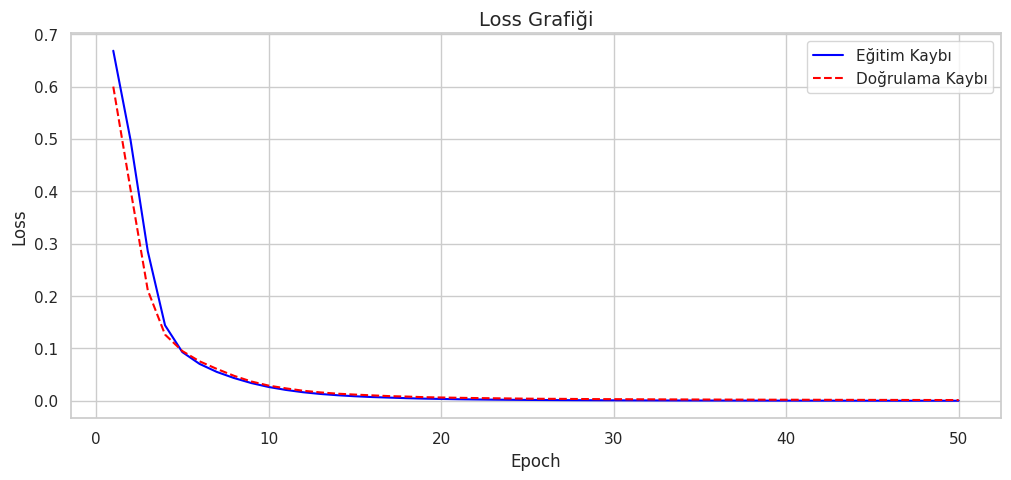

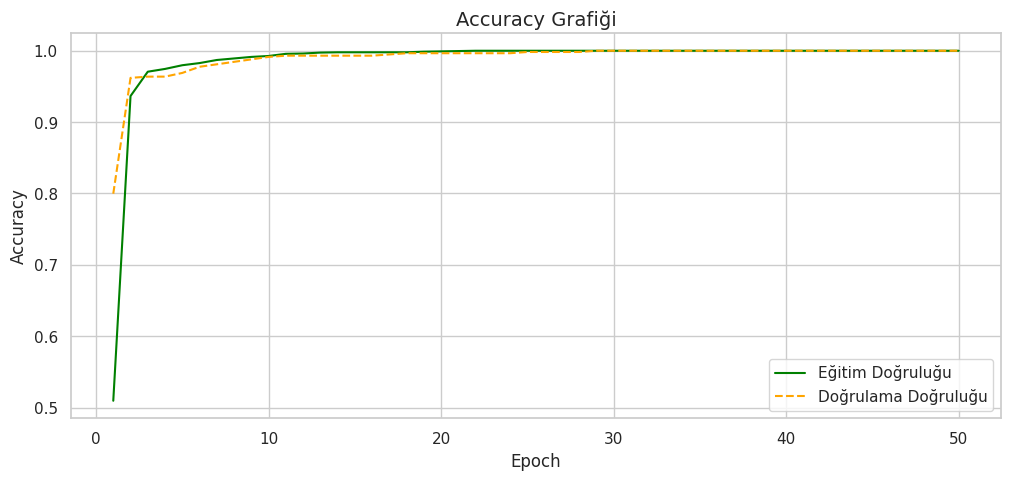

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Epoch numaraları
epochs = range(1, len(train_loss) + 1)

# Grafik çizimi
plt.figure(figsize=(12, 5))

# Loss grafiği
plt.plot(epochs, train_loss, label='Eğitim Kaybı', color='blue', linestyle='-')
plt.plot(epochs, val_loss, label='Doğrulama Kaybı', color='red', linestyle='--')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Loss Grafiği', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Accuracy grafiği
plt.figure(figsize=(12, 5))
plt.plot(epochs, train_accuracy, label='Eğitim Doğruluğu', color='green', linestyle='-')
plt.plot(epochs, val_accuracy, label='Doğrulama Doğruluğu', color='orange', linestyle='--')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy Grafiği', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#KNN MODEL

KNN Doğruluk Skoru: 0.9948213360952874

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       994
           1       1.00      0.99      0.99       937

    accuracy                           0.99      1931
   macro avg       1.00      0.99      0.99      1931
weighted avg       0.99      0.99      0.99      1931



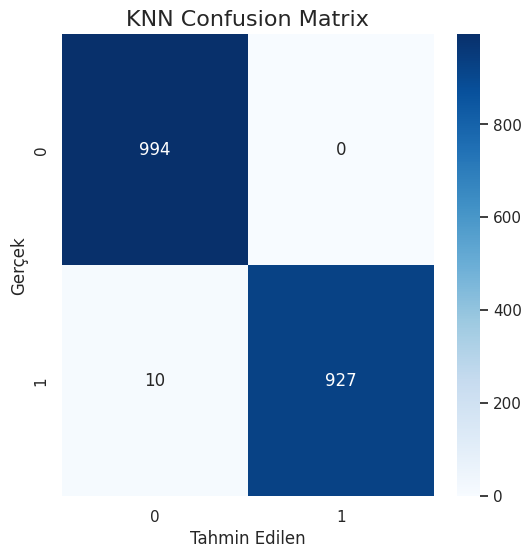

In [ ]:




knn_model = KNeighborsClassifier(n_neighbors=5)  # n_neighbors=5 (varsayılan k değeri)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Performans değerlendirme
print("KNN Doğruluk Skoru:", accuracy_score(y_test, y_pred_knn))
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix görselleştirme
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix", fontsize=16)
plt.xlabel("Tahmin Edilen", fontsize=12)
plt.ylabel("Gerçek", fontsize=12)
plt.show()


k=1: Eğitim Doğruluğu=1.0000, Test Doğruluğu=0.9990
k=2: Eğitim Doğruluğu=0.9993, Test Doğruluğu=0.9964
k=3: Eğitim Doğruluğu=0.9993, Test Doğruluğu=0.9964
k=4: Eğitim Doğruluğu=0.9976, Test Doğruluğu=0.9948
k=5: Eğitim Doğruluğu=0.9983, Test Doğruluğu=0.9948
k=6: Eğitim Doğruluğu=0.9959, Test Doğruluğu=0.9943
k=7: Eğitim Doğruluğu=0.9962, Test Doğruluğu=0.9943
k=8: Eğitim Doğruluğu=0.9952, Test Doğruluğu=0.9917
k=9: Eğitim Doğruluğu=0.9955, Test Doğruluğu=0.9927
k=10: Eğitim Doğruluğu=0.9931, Test Doğruluğu=0.9912
k=11: Eğitim Doğruluğu=0.9934, Test Doğruluğu=0.9917
k=12: Eğitim Doğruluğu=0.9903, Test Doğruluğu=0.9886
k=13: Eğitim Doğruluğu=0.9907, Test Doğruluğu=0.9886
k=14: Eğitim Doğruluğu=0.9886, Test Doğruluğu=0.9876
k=15: Eğitim Doğruluğu=0.9896, Test Doğruluğu=0.9876
k=16: Eğitim Doğruluğu=0.9872, Test Doğruluğu=0.9871
k=17: Eğitim Doğruluğu=0.9879, Test Doğruluğu=0.9876
k=18: Eğitim Doğruluğu=0.9865, Test Doğruluğu=0.9860
k=19: Eğitim Doğruluğu=0.9865, Test Doğruluğu=0.9871
k=

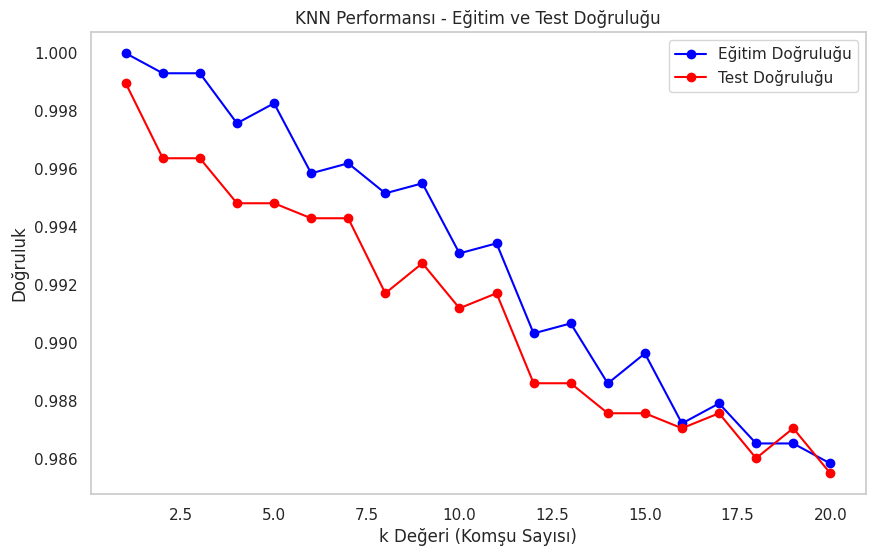

In [ ]:

# Denenecek k değerlerinin listesi
k_values = range(1, 21)  # 1'den 20'ye kadar k değerleri
train_scores = []
test_scores = []

# Farklı k değerleri için model eğitimi ve test doğruluğu
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Eğitim ve test doğruluğu
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    train_scores.append(accuracy_score(y_train, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

# K değerlerine göre doğrulukları göster
for k, train_score, test_score in zip(k_values, train_scores, test_scores):
    print(f"k={k}: Eğitim Doğruluğu={train_score:.4f}, Test Doğruluğu={test_score:.4f}")

# K değerine göre doğruluk skorlarını görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, marker='o', label='Eğitim Doğruluğu', color='blue')
plt.plot(k_values, test_scores, marker='o', label='Test Doğruluğu', color='red')
plt.title("KNN Performansı - Eğitim ve Test Doğruluğu")
plt.xlabel("k Değeri (Komşu Sayısı)")
plt.ylabel("Doğruluk")
plt.legend()
plt.grid()
plt.show()


In [ ]:
#LOGİSTİC REGRESYON

In [ ]:
# Lojistik regresyon modelini eğit
log_model = LogisticRegression(max_iter=1000, random_state=42,C=0.01,class_weight='balanced')
log_model.fit(X_train, y_train)

# Test setinde tahmin
y_pred_log = log_model.predict(X_test)

# Model performansını değerlendirme
print("Lojistik Regresyon Doğruluk Skoru:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Lojistik Regresyon Doğruluk Skoru: 0.9704816157431383
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       994
           1       1.00      0.94      0.97       937

    accuracy                           0.97      1931
   macro avg       0.97      0.97      0.97      1931
weighted avg       0.97      0.97      0.97      1931



In [ ]:
# Random Forest modelini eğit
rf_model = RandomForestClassifier(max_depth=5,n_estimators=5, random_state=42,min_samples_split=10,class_weight='balanced')
rf_model.fit(X_train, y_train)

# Test setinde tahmin
y_pred_rf = rf_model.predict(X_test)

# Model performansını değerlendirme
print("Random Forest Doğruluk Skoru:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Doğruluk Skoru: 0.9994821336095288
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       994
           1       1.00      1.00      1.00       937

    accuracy                           1.00      1931
   macro avg       1.00      1.00      1.00      1931
weighted avg       1.00      1.00      1.00      1931



In [ ]:
#OVERFİTTİNG ANALİZİ

In [ ]:
#Çapraz doğrulama skorları eğitim doğruluğundan düşükse ve bu fark belirginse aşırı öğrenme söz konusu olur
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Çapraz Doğrulama Skorları:", cv_scores)
print("Ortalama Başarı Oranı:", cv_scores.mean())


Çapraz Doğrulama Skorları: [1.         0.99827288 1.         0.99827288 1.        ]
Ortalama Başarı Oranı: 0.9993091537132989


In [ ]:

#Eğitim doğruluğu ve test doğruluğu arasındaki büyük fark (örneğin >%5 fark), aşırı öğrenmenin göstergesidir.
# Eğitim ve test doğruluklarını hesapla
train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
test_accuracy = accuracy_score(y_test, rf_model.predict(X_test))

print(f"Eğitim Doğruluğu: {train_accuracy}")
print(f"Test Doğruluğu: {test_accuracy}")


Eğitim Doğruluğu: 0.9996545768566494
Test Doğruluğu: 0.9994821336095288


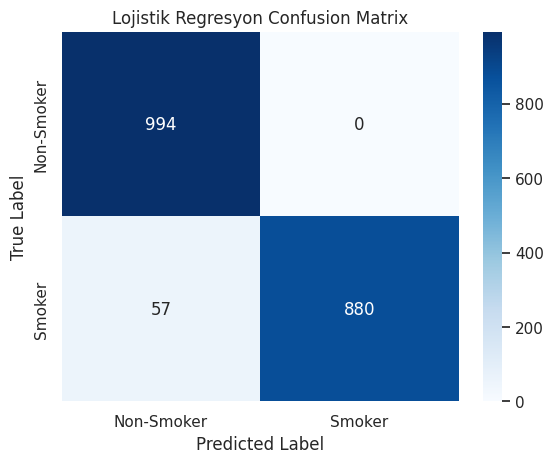

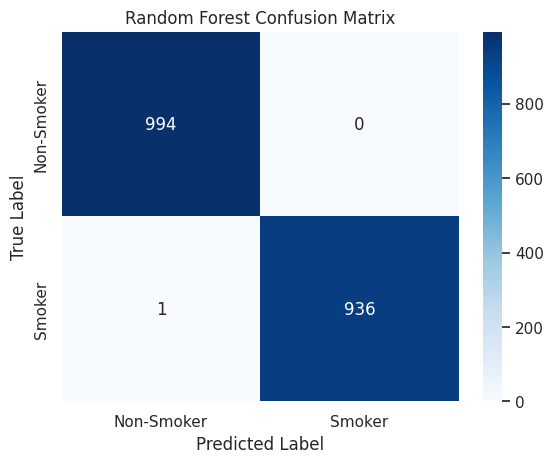

In [ ]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Smoker", "Smoker"], yticklabels=["Non-Smoker", "Smoker"])
    plt.title(f"{model_name} Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

# Lojistik Regresyon Confusion Matrix
plot_confusion_matrix(y_test, y_pred_log, "Lojistik Regresyon")

# Random Forest Confusion Matrix
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

SVM Doğruluk Skoru: 0.9953392024857587
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       994
           1       1.00      0.99      1.00       937

    accuracy                           1.00      1931
   macro avg       1.00      1.00      1.00      1931
weighted avg       1.00      1.00      1.00      1931



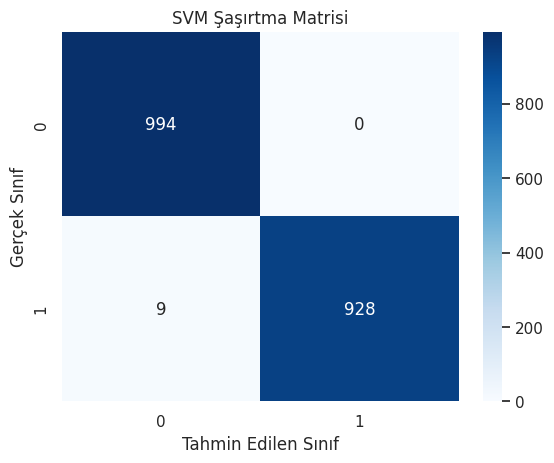

In [ ]:
svm_model = SVC(kernel='linear', C=1.0, class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Tahminler
y_pred_svm = svm_model.predict(X_test)

# Doğruluk ve metrikler
print("SVM Doğruluk Skoru:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Şaşırtma Matrisi Görselleştirme
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Şaşırtma Matrisi')
plt.ylabel('Gerçek Sınıf')
plt.xlabel('Tahmin Edilen Sınıf')
plt.show()

<ipython-input-582-95da9fe75adb>:20: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.



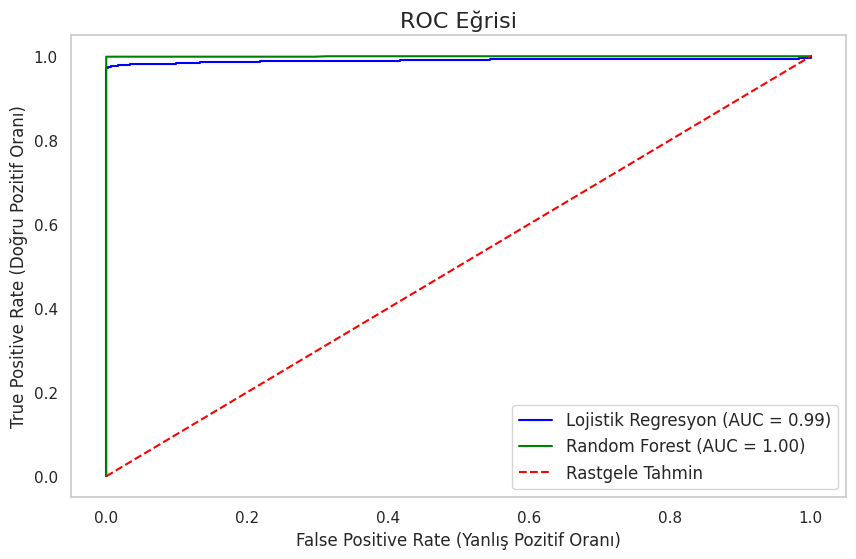

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
 #Lojistik Regresyon için tahmin olasılıkları
y_proba_log = log_model.predict_proba(X_test)[:, 1]  # Pozitif sınıf (1) için olasılık

# Random Forest için tahmin olasılıkları
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Pozitif sınıf (1) için olasılık

# ROC eğrisi değerleri
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

# AUC (Area Under Curve) hesaplama
auc_log = roc_auc_score(y_test, y_proba_log)
auc_rf = roc_auc_score(y_test, y_proba_rf)

# ROC eğrisi çizimi
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f"Lojistik Regresyon (AUC = {auc_log:.2f})", color='blue')
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Rastgele Tahmin', color='red')  # Rastgele tahmin çizgisi
plt.xlabel('False Positive Rate (Yanlış Pozitif Oranı)', fontsize=12)
plt.ylabel('True Positive Rate (Doğru Pozitif Oranı)', fontsize=12)
plt.title('ROC Eğrisi', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()